# GLBL 5010 - Assignment 1

In [4]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
# Load the dataset from the provided URL

url = 'https://github.com/akhandelwal8/globaleconomics/blob/main/hwk/hwk1_convergence.csv?raw=true'
df = pd.read_csv(url, sep='\t')

## Task 1

In [6]:
# Calculate average annual growth rates and add as a new column

gdp60 = df['gdppc1960']
gdp00 = df['gdppc2000']
n = 2000-1960
g = np.log(gdp00/gdp60)/n

df['growth'] = g

Text(0, 0.5, 'Number of Countries')

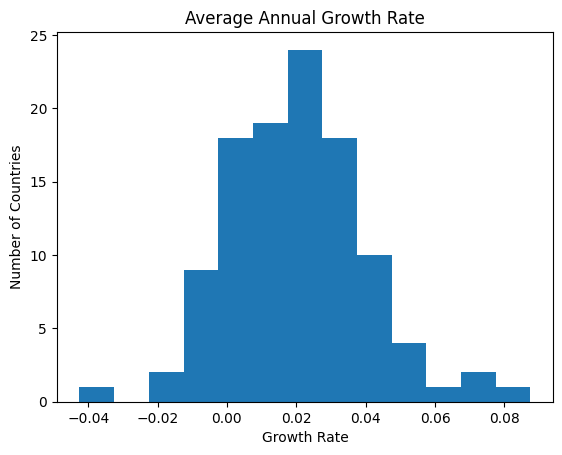

In [7]:
# Display a histogram of the growth rates

plt.hist(g,bins=np.arange(np.min(g),np.max(g)+0.01,0.01))
plt.title("Average Annual Growth Rate")
plt.xlabel("Growth Rate")
plt.ylabel("Number of Countries")

## Task 2

In [8]:
# Calculate and print percentiles of the growth rates

print(f"The percentiles of the growth rates are:\n\t10th: {np.nanpercentile(g,10):.2g} \
      \n\t25th: {np.nanpercentile(g,25):.2g}\n\t50th: {np.nanpercentile(g,50):.2g}\n\t75th: {np.nanpercentile(g,75):.2g} \
      \n\t90th: {np.nanpercentile(g,90):.2g}")

The percentiles of the growth rates are:
	10th: -0.0031       
	25th: 0.0061
	50th: 0.019
	75th: 0.032       
	90th: 0.044


## Task 3

In [9]:
# Identify and print the countries with the highest and smallest growth rates

print('Highest 3 growth rates:')
print(df.dropna().sort_values('growth')[['code','growth']].tail(3))
print('\t')
print('Smallest 3 growth rates:')
print(df.dropna().sort_values('growth')[['code','growth']].head(3))

Highest 3 growth rates:
    code    growth
85   KOR  0.074607
24   BWA  0.076765
103  MLT  0.084839
	
Smallest 3 growth rates:
    code    growth
32   COD -0.042519
115  NGA -0.018859
114  NER -0.016527


## Task 4

Text(0.5, 1.0, 'Growth vs Initial GDP per capita')

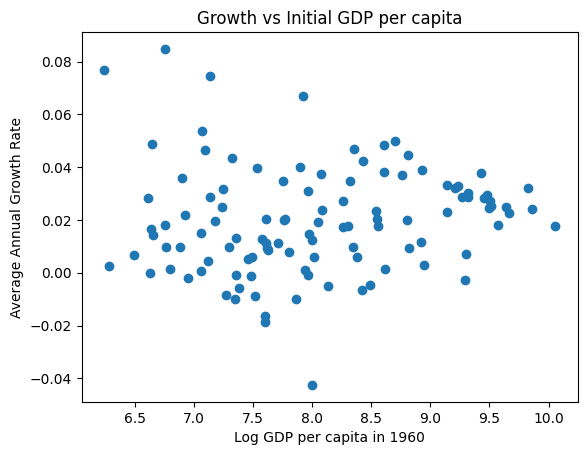

In [10]:
# Scatter plot of growth rates vs initial GDP per capita

plt.scatter(np.log(gdp60), g)
plt.xlabel('Log GDP per capita in 1960')
plt.ylabel('Average Annual Growth Rate')
plt.title('Growth vs Initial GDP per capita')

### Interpretation
The relationship between log GDPPC in 1960 and average annual growth rate appears to be slightly upward sloping. On a global scale, the graph shows poor evidence of convergence.

## Task 5

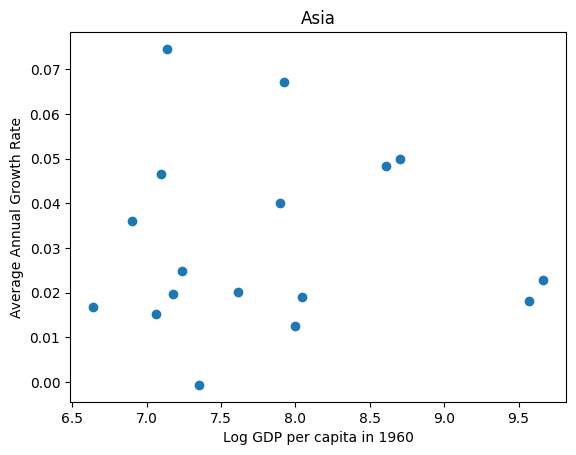

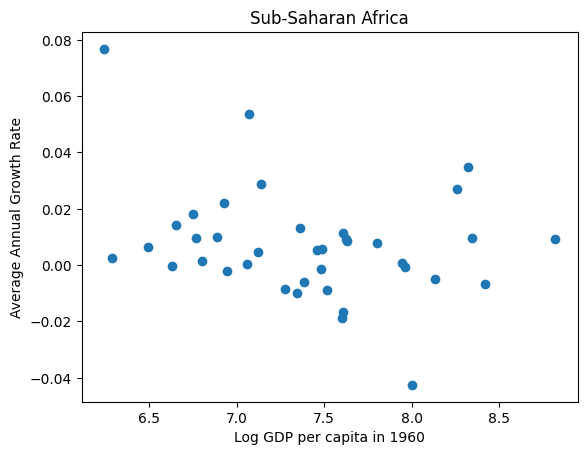

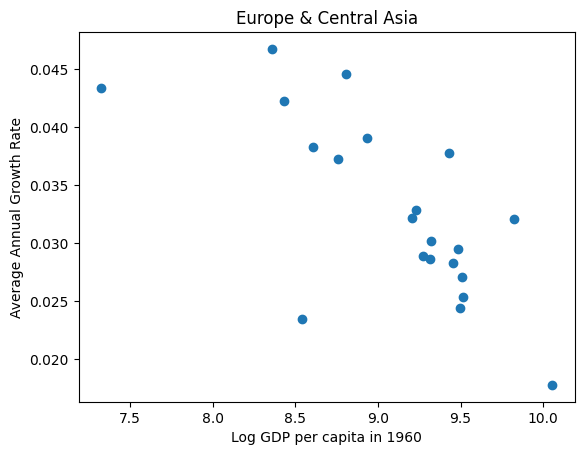

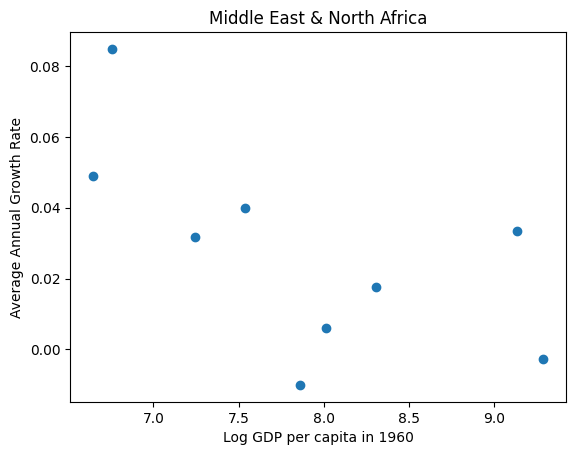

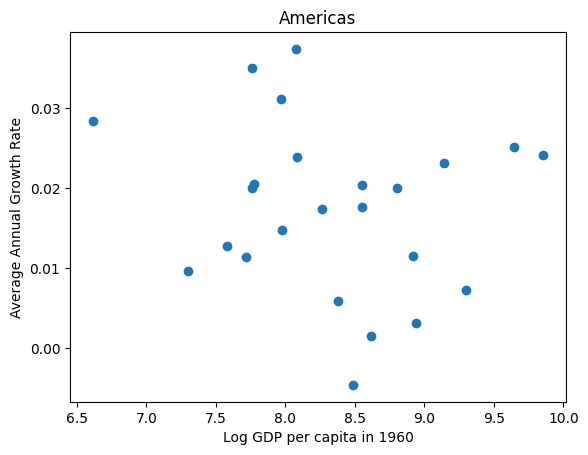

In [11]:
# Scatter plots of gdppc1960 and growth rates by region

for r in df['region'].unique():
    plt.scatter(np.log(df[df['region']==r]['gdppc1960']), df[df['region']==r]['growth'])
    plt.title(r)
    plt.xlabel('Log GDP per capita in 1960')
    plt.ylabel('Average Annual Growth Rate')
    plt.show()

### Interpretation
These graphs show evidence of conditional convergence for certain regions. Some regions show better convergence (richer countries in 1960 experienced slower growth than poorer countries (Subsaharan Africa, Middle East and North Africa, and Europe and Central Asia)). In constrast, other regions (Americas and Asia) do not demonstrate the same pattern of conditional convergence (within those regions, the production functions of countries likely differ a lot).

## Task 6

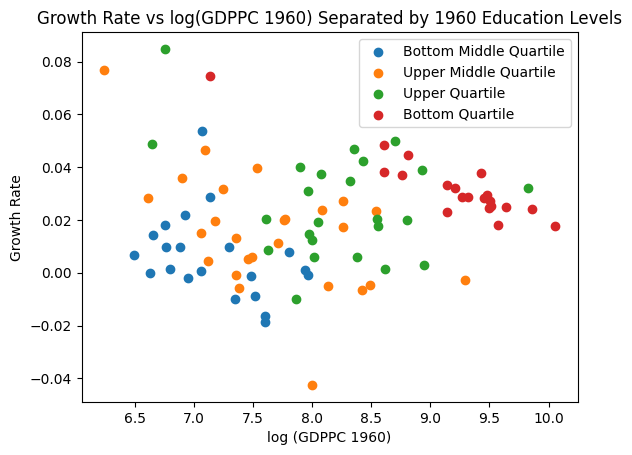

In [14]:
log60 = np.log(gdp60)
df['log1960'] = log60

edu25 = np.nanpercentile(df['edu1960'],25)
edu50 = np.nanpercentile(df['edu1960'],50)
edu75 = np.nanpercentile(df['edu1960'],75)

plt.figure()
plt.scatter(df['log1960'][df['edu1960']<=edu25],df['growth'][df['edu1960']<=edu25])
plt.xlabel("log (GDPPC 1960)")
plt.ylabel("Growth Rate")
plt.title("Growth Rate vs log(GDPPC 1960) Separated by 1960 Education Levels")

plt.scatter(df['log1960'][(edu25<= df['edu1960']) & (df['edu1960']<=edu50)],df['growth'][(edu25<= df['edu1960']) & (df['edu1960']<=edu50)])
plt.scatter(df['log1960'][(edu50<= df['edu1960']) & (df['edu1960']<=edu75)],df['growth'][(edu50<= df['edu1960']) & (df['edu1960']<=edu75)])
plt.scatter(df['log1960'][edu75<= df['edu1960']],df['growth'][edu75<= df['edu1960']])

plt.legend({"Bottom Quartile","Bottom Middle Quartile","Upper Middle Quartile","Upper Quartile"})

plt.show()

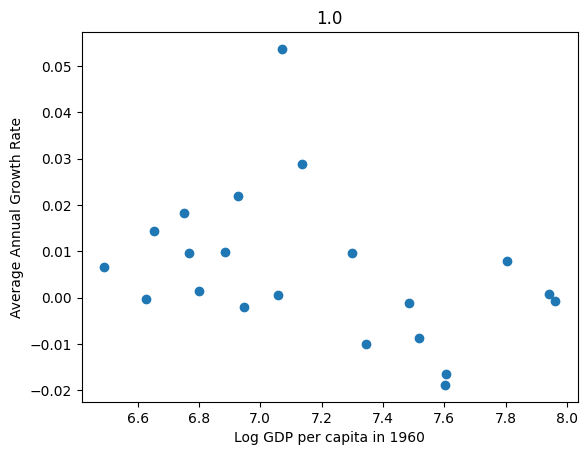

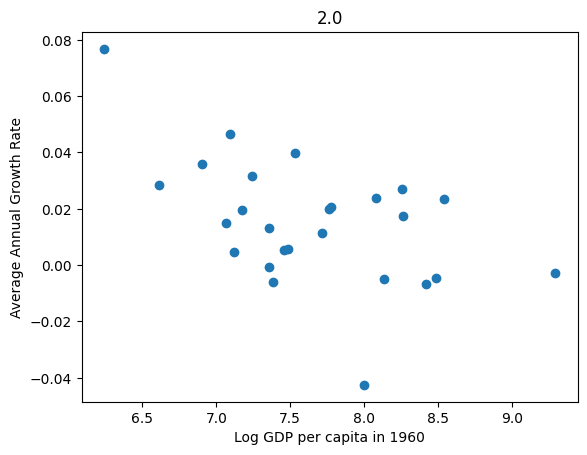

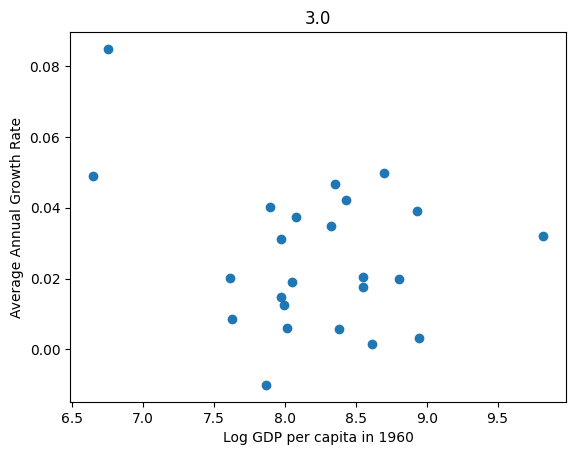

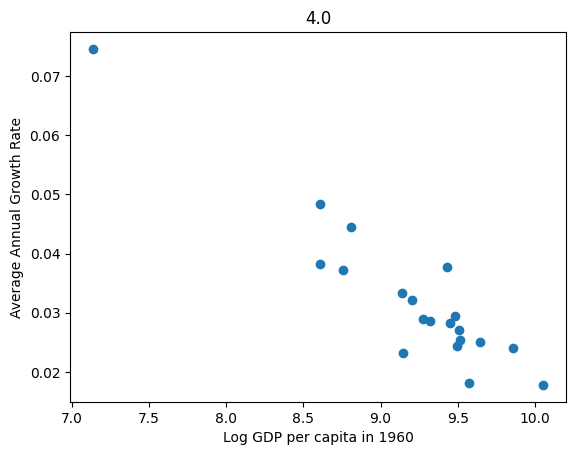

In [ ]:
# Scatter plots of gdppc1960 and growth rates by education quartiles

df['quartile'] = pd.qcut(df['edu1960'], 4, labels=False) + 1
df = df.sort_values('quartile')

for q in df['quartile'].dropna().unique():
    plt.scatter(np.log(df[df['quartile']==q]['gdppc1960']), df[df['quartile']==q]['growth'])
    plt.title(q)
    plt.xlabel('Log GDP per capita in 1960')
    plt.ylabel('Average Annual Growth Rate')
    plt.show()

### Interpretation
When divided into quartiles based on education levels in 1960, each quartile shows evidence of conditional converegence, though some stronger than others. This means that countries with similar education levels have converged economically, as investors directed their capital into countries with a lower GDPPC compared to countries with higher GDPPC. Interestingly, the data shows that higher education is associated both with higher GDP and higher growth rates.